In [ ]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

from transformers import BlipProcessor, BlipForConditionalGeneration
from datasets import load_dataset

In [ ]:
# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base"
).to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:86: UserWarning: 
Access to the secret `HF_TOKEN` has not been granted on this notebook.
You will not be requested again.
Please restart the session if you want to be prompted again.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [ ]:
from torchvision import datasets, transforms
import os
from torchvision.datasets import FakeData
from torchvision.datasets import STL10
dataset = STL10(root="./data", split="test", download=True)

100%|██████████| 2.64G/2.64G [01:07<00:00, 39.3MB/s]


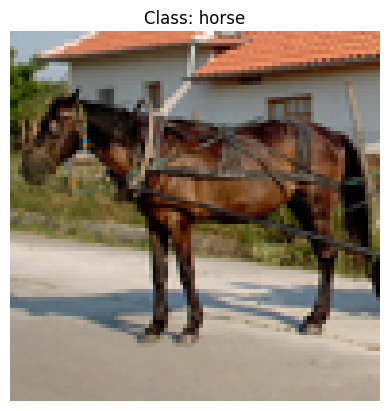

In [ ]:
image, label = dataset[25]  # 6th image
plt.imshow(image)
plt.axis("off")
plt.title(f"Class: {dataset.classes[label]}")
plt.show()

In [ ]:
inputs = processor(images=image, return_tensors="pt").to(device)

In [ ]:
with torch.no_grad():
    output_ids = model.generate(**inputs, max_length=30)

In [ ]:
caption = processor.decode(output_ids[0], skip_special_tokens=True)

print("Generated Caption:")
print(caption)

Generated Caption:
a horse pulling a carriage down a street
